# John-Henry Pezzuto - HW8

### Load Packages & Data

In [16]:
import pandas as pd
import numpy as np
from ggplot import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

strongdrink = pd.read_csv('data/strongdrink.txt')

NameError: name 'src' is not defined

In [17]:
strongdrink['Cultivar'] = drink['cultivar'].astype('str')
X = strongdrink[['alco', 'malic', 'tot_phen', 'color_int']].values
y = strongdrink['cultivar'].values

#### (a) Create a scatterplot of the data

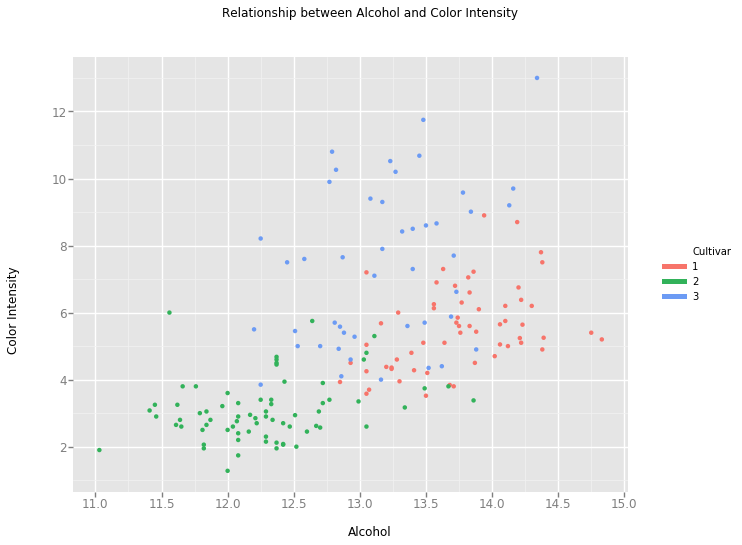

<ggplot: (-9223372036558268882)>

In [15]:
ggplot(strongdrink, aes(x='alco', y='color_int', color = 'Cultivar')) +\
    geom_point() +\
    labs(title = "Relationship between Alcohol and Color Intensity",
         x = "Alcohol",
         y = "Color Intensity")

#### (b) Fit a multinomial logistic model

In [23]:
k = 4
clf_mlog = KFold(n_splits=4, shuffle=True, random_state=22)
clf_mlog.get_n_splits(X)
MSE = np.zeros(k)
C = np.zeros(200)
MSE_C = np.zeros(200)

In [24]:
for c in range(200):
    k_ind = int(0)
    for train_index, test_index in clf_mlog.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        LogReg = LogisticRegression(multi_class='multinomial',
                                    solver='newton-cg', C = (c/100 + 0.01))
        LogReg.fit(X_train, y_train)
        y_pred = LogReg.predict(X_test)
        error = y_test != y_pred
        MSE[k_ind] = error.mean()
        k_ind += 1
    C[c] = c/100 + 0.01
    MSE_C[c] =  MSE.mean()
MSE_multilog = pd.DataFrame({'C':C, 'MSE':MSE_C})

In [25]:
MSE_multilog.sort_values(['MSE']).head(25)

,C,MSE
43,0.44,0.068182
44,0.45,0.068182
42,0.43,0.068182
41,0.42,0.068182
40,0.41,0.068182
39,0.40,0.068182
27,0.28,0.068182
28,0.29,0.068182
29,0.30,0.068182
30,0.31,0.068182


We can conclude that the multinomial logistic model has the smallest MSE of 0.068182, when the value of C between 0.28 and 0.48 with the standard 'I2' penalty.

#### (c) Use sklearn.ensemble.RandomForestClassifier

In [27]:
MSE_rf = pd.DataFrame({"n_estimator" : np.zeros(5),
                         "min_sample_leaf" : np.zeros(5),
                         "max_depth" : np.zeros(5),
                         "MSE" : np.zeros(5)})
MSE_df = MSE_rf[:0]

for i in range(15):
    for j in range(15):
        for tree in range(5):
            rf = RandomForestClassifier(n_estimators = (tree * 50 + 50),
                                        min_samples_leaf = (i * 5 + 5),
                                        max_depth = (j + 1), bootstrap=True, 
                                        oob_score=True, random_state=22)
            rf.fit(X, y)
            MSE_rf["n_estimator"][tree] = tree * 50 + 50
            MSE_rf["max_depth"][tree] = j + 1
            MSE_rf["min_sample_leaf"][tree] = i * 5 + 5
            MSE_rf["MSE"][tree] = 1 - rf.oob_score_
        MSE_df= pd.concat([MSE_df, MSE_rf])

In [28]:
MSE_df.index = range(len(MSE_df))
MSE_df.sort_values(['MSE']).head(20)

,MSE,max_depth,min_sample_leaf,n_estimator
96,0.068182,5.0,10.0,100.0
126,0.068182,11.0,10.0,100.0
116,0.068182,9.0,10.0,100.0
131,0.068182,12.0,10.0,100.0
111,0.068182,8.0,10.0,100.0
106,0.068182,7.0,10.0,100.0
121,0.068182,10.0,10.0,100.0
101,0.068182,6.0,10.0,100.0
136,0.068182,13.0,10.0,100.0
86,0.068182,3.0,10.0,100.0


We can conclude that the random forest model has the smallest MSE of 0.068182 when max_depth is between 5 and 15, min_sample_leaf = 10 and n_estimator = 100 (or rarely 200).

#### (d) Use sklearn.svm.SVC to fit a support vector machines model

In [37]:
k = 4
clf_svm = KFold(n_splits=k, random_state=22, shuffle=True)
clf_svm.get_n_splits(X)
MSE = np.zeros(k)
MSE_C = pd.DataFrame({"C" : np.zeros(80),
                      "G" : np.zeros(80),
                      "MSE" : np.zeros(80)})
MSE_SVM = MSE_C[:0]

for g in range(80):
    for c in range(80):
        k_ind = int(0)
        for train_index, test_index in clf_svm.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            svc = svm.SVC(kernel='rbf', gamma = (g/20 + 0.05),
                          C=c/20 + 0.05)
            svc.fit(X_train, y_train)
            y_pred = svc.predict(X_test)
            error = y_test != y_pred
            MSE[k_ind] = error.mean()
            k_ind += 1
        MSE_C['C'][c] = c/20 + 0.05
        MSE_C['G'][c] = g/20 + 0.05
        MSE_C['MSE'][c] =  MSE.mean()
    MSE_SVM = pd.concat([MSE_SVM, MSE_C])


In [38]:
MSE_SVM.index = range(len(MSE_SVM))
MSE_SVM.sort_values(['MSE']).head(25)

,C,G,MSE
2659,1.00,1.70,0.045455
2578,0.95,1.65,0.045455
2658,0.95,1.70,0.045455
224,3.25,0.15,0.051136
225,3.30,0.15,0.051136
226,3.35,0.15,0.051136
227,3.40,0.15,0.051136
228,3.45,0.15,0.051136
229,3.50,0.15,0.051136
218,2.95,0.15,0.051136


We can conclude that the SVM model has the smallest MSE of 0.045455 when C = 1 and gamma = 1.7; when C = 0.95 and gamma = 1.65; or when C = 0.95 and gamma = 1.70.

#### (e) Use sklearn.neural network.MLPClassifier

In [42]:
k = 4
clf_mlp = KFold(n_splits=k, random_state=22, shuffle=True)
clf_mlp.get_n_splits(X)
MSE = np.zeros(k)
activ = np.array(['identity', 'logistic', 'tanh', 'relu'])
MSE_al = pd.DataFrame({'activation' : np.zeros(20),
                       'hidden layer' : np.zeros(20),
                       'alpha' : np.zeros(20),
                       'MSE':np.zeros(20)})
MSE_mlp = MSE_al[:0]

for ac in range(4):
    for h in range(8):
        for al in range(20):
            k_ind = int(0)
            for train_index, test_index in clf_mlp.split(X):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]
                mlp = MLPClassifier(activation=activ[ac], solver='lbfgs',
                                    alpha=(al/20 + 0.05), 
                                    hidden_layer_sizes = ((50 * (h + 1)),))
                mlp.fit(X_train, y_train)
                y_pred = mlp.predict(X_test)
                error = y_test != y_pred
                MSE[k_ind] = error.mean()
                k_ind += 1
            MSE_al['activation'][al] = activ[ac]
            MSE_al['hidden layer'][al] = 50 * (h + 1)
            MSE_al['alpha'][al] = al/20 + 0.05
            MSE_al['MSE'][al] =  MSE.mean()
        MSE_mlp = pd.concat([MSE_mlp, MSE_al])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

In [43]:
MSE_mlp.index = range(len(MSE_mlp))
MSE_mlp.sort_values(['MSE']).head(25)

,MSE,activation,alpha,hidden layer
541,0.039773,relu,0.10,200.0
629,0.039773,relu,0.50,400.0
558,0.039773,relu,0.95,200.0
620,0.039773,relu,0.05,400.0
506,0.045455,relu,0.35,100.0
562,0.045455,relu,0.15,250.0
525,0.045455,relu,0.30,150.0
596,0.045455,relu,0.85,300.0
621,0.045455,relu,0.10,400.0
559,0.045455,relu,1.00,200.0


We can conclude that the neural network MLP model has the lowest MSE of 0.039773 when activation = relu, alpha = 0.10 and hidden layer = 200; when alpha = .5 and hidden layer = 400; or when alpha = .95 and hidden layer = 200; or when alpha = .05 and hidden layer = 400.

#### (f) Which is the best predictor

In [44]:
logit = np.array(MSE_multilog.sort_values(['MSE']).head(5)['MSE'])
RF = np.array(MSE_df.sort_values(['MSE']).head(5)['MSE'])
SVM = np.array(MSE_SVM.sort_values(['MSE']).head(5)['MSE'])
mlp = np.array(MSE_mlp.sort_values(['MSE']).head(5)['MSE'])


FinalComparison = pd.DataFrame({'Logit':logit, 
                     'RF':RF,
                     'SVM':SVM,
                     'MLP':mlp})
FinalComparison

,Logit,MLP,RF,SVM
0,0.068182,0.039773,0.068182,0.045455
1,0.068182,0.039773,0.068182,0.045455
2,0.068182,0.039773,0.068182,0.045455
3,0.068182,0.039773,0.068182,0.051136
4,0.068182,0.045455,0.068182,0.051136


Comparing these four different models by their first five smallest MSE values, we can conclude that MLP neural network model is the best predictor of cultivar since it consistently has the smallest MSE values.

In [45]:
for i in range(5):
    print("Thanks for Everything Chelsea and Sushmita!")

Thanks for Everything Chelsea and Sushmita!
Thanks for Everything Chelsea and Sushmita!
Thanks for Everything Chelsea and Sushmita!
Thanks for Everything Chelsea and Sushmita!
Thanks for Everything Chelsea and Sushmita!
